In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal

### ResourceQ Pico 1


In [2]:
df = pd.read_csv('250910_LvrC_D53E_d318_resourceQ.csv',delimiter='\t',encoding = "UTF-16", header=2)
print(df.columns)

Index(['ml', 'mAU', 'ml.1', 'mS/cm', 'ml.2', '%B', 'ml.3', 'Injection', 'ml.4',
       'Fraction', 'ml.5', 'mAU.1'],
      dtype='object')


Text(0.5, 1.0, 'LvrC D53E ∆318 - Resource Q')

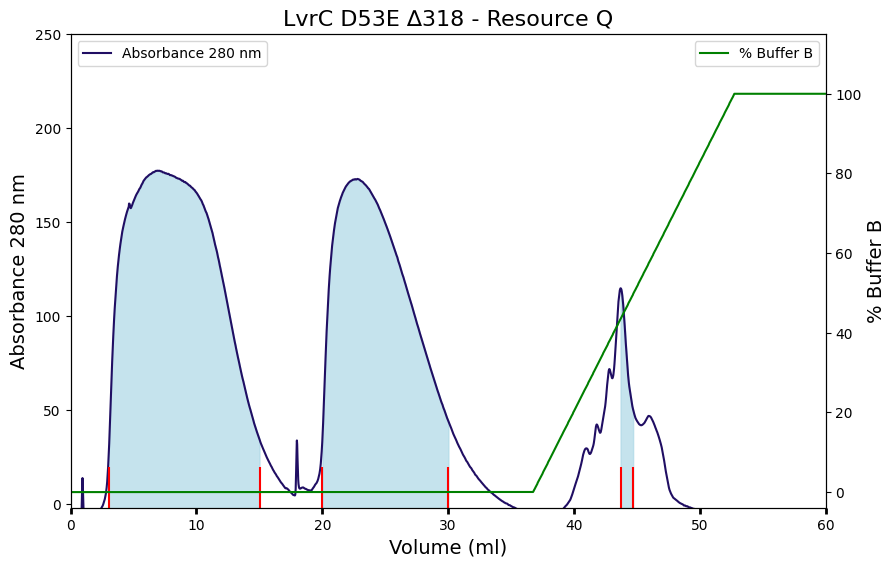

In [14]:
#generar gráficas
fig, ax = plt.subplots()
twinx = ax.twinx()
fig.subplots_adjust(right=0.88, top=0.90)
fig.set_size_inches(10,6)


ax.plot(df['ml'], df['mAU'], "#200e63", label="Absorbance 280 nm")
twinx.plot(df['ml.2'], df['%B'], "green", label="% Buffer B")


ax.set_xlabel("Volume (ml)", fontsize=14)
ax.set_ylabel("Absorbance 280 nm", fontsize=14)
ax.set_xlim(0, 60)
ax.set_ylim(-2, 250)


twinx.set_ylim(-4, 115)
twinx.set_ylabel('% Buffer B',fontsize=14)

### Rellenar área bajo la curva donde se toman las fracciones
regions = [(3.02, 15.01), (20.01, 30.02), (43.7, 44.7)]
for start, end in regions:
    ax.vlines([start, end], -50, 20, colors='red')

# Fill areas under the curve for specified regions
for start, end in regions:
    mask = (df['ml'] >= start) & (df['ml'] <= end)
    ax.fill_between(df['ml'], df['mAU'], where=mask, color='lightblue', y2= -50, alpha=0.7)


tkw = dict(size=4, width=2)
ax.tick_params(axis='x', **tkw)
ax.legend(loc="upper left")
twinx.legend()
plt.title('LvrC D53E ∆318 - Resource Q', fontsize = 16)

#plt.savefig('D53E_d318_Pico1_resourceQ.svg')


### S200 Pico 2


In [15]:
df = pd.read_csv('250910_LvrC_D53E_d318_P1_S200.csv',delimiter='\t',encoding = "UTF-16", header=2)
print(df.columns)

Index(['ml', 'mAU', 'ml.1', 'mS/cm', 'ml.2', '%B', 'ml.3', 'Injection', 'ml.4',
       'Fraction', 'ml.5', 'mAU.1'],
      dtype='object')


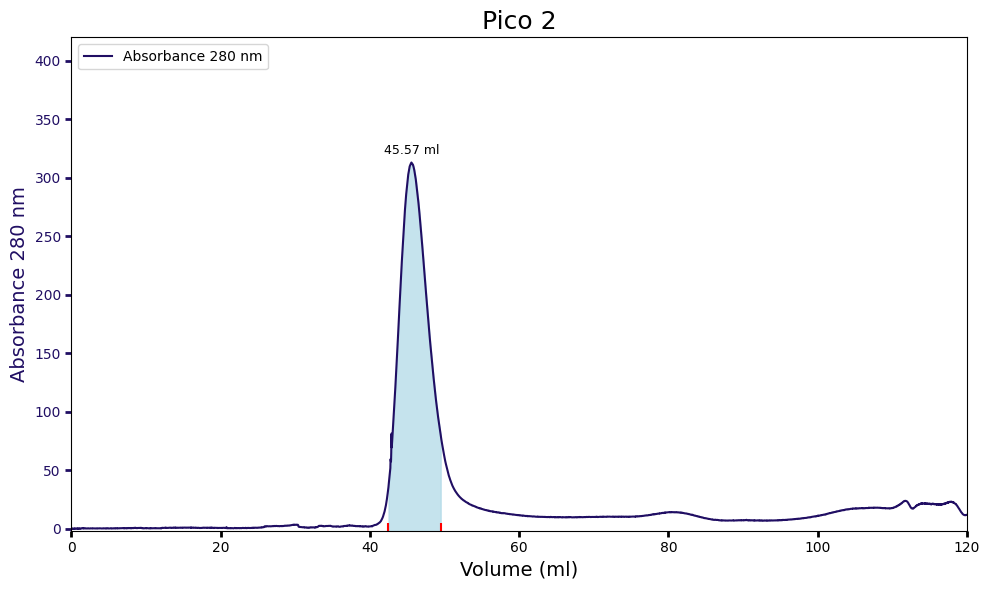

In [ ]:
#generar gráficas
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.88, top=0.95)
fig.set_size_inches(10,6)


p1, = ax.plot(df['ml'], df['mAU'], "#200e63", label="Absorbance 280 nm")

ax.set_xlabel("Volume (ml)", fontsize=14)
ax.set_ylabel("Absorbance 280 nm", fontsize=14)
ax.set_xlim(0, 120)
ax.set_ylim(-2, 420)
ax.yaxis.label.set_color(p1.get_color())


tkw = dict(size=4, width=2)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)
ax.legend(handles=[p1], loc="upper left")
#ax.vlines([48.699888, 52.699301, 73.701307, 77.700727], -50, 20, colors='red')

### Rellenar área bajo la curva donde se toman las fracciones
regions = [(42.5, 49.5)]
for start, end in regions:
    ax.vlines([start, end], -10, 5, colors='red')

# Fill areas under the curve for specified regions
for start, end in regions:
    mask = (df['ml'] >= start) & (df['ml'] <= end)
    ax.fill_between(df['ml'], df['mAU'], where=mask, color='lightblue', y2= -50, alpha=0.7)

# Find peaks in df['mAU']
peaks, _ = signal.find_peaks(df['mAU'], prominence=0.1, height=100)  # Adjust prominence as needed

# Annotate each peak
for peak in peaks:
    x = df['ml'].iloc[peak]
    y = df['mAU'].iloc[peak]
    if x > 120 or x < 0:  # Ensure x is within the x-axis limits
        continue
    ax.text(x, y + 5, f"{x:.2f} ml", fontsize=9, ha='center', va='bottom', color='black')
plt.title('Pico 2', fontsize = 18)
plt.tight_layout()

#plt.savefig('S200_16_60_p2.svg')


### Cálculo de peso molecular según calibración de la columna

In [26]:
def mw_calibration(ve):
    
    return 10**((((ve-45.14)/(120-45.14))-1.11)/(-0.359))


print('HMW: ',mw_calibration(45.57), f'es un {mw_calibration(45.57)/33.4}') 


HMW:  1191.0276689934735 es un 35.65951104770879
